 #

# Ma422 Project - Adult income dataset

Objective : The objective is to predict, according to some characteristics, if a person earns more than $50K per year or not


We import the librairies we need to read the datas and analyse it.

In [61]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

We open and read the datas file.

In [62]:
df = pd.read_csv('src/datas/adult.csv', header=0)
df = df.sample(frac=0.2)  # Working with 20% of the dataset to avoid long time program run
#df_copy = df.copy()
print(df)

       age     workclass  fnlwgt     education  educational-num  \
30057   64     Local-gov  182866       HS-grad                9   
45969   26  Self-emp-inc  187652       HS-grad                9   
13556   41       Private  413365       HS-grad                9   
21149   22       Private  162869  Some-college               10   
35406   19       Private   86860  Some-college               10   
...    ...           ...     ...           ...              ...   
37940   38       Private  131808     Assoc-voc               11   
22440   41       Private  141642       HS-grad                9   
20523   42       Private  263608  Some-college               10   
46878   42     Local-gov  191149       Masters               14   
14538   49       Private  164733       HS-grad                9   

           marital-status        occupation    relationship   race  gender  \
30057             Widowed     Other-service       Unmarried  White  Female   
45969            Divorced   Exec-manage

## 1 - Quick dataset analysis

Now that the dataset is imported in the jupyter file, we can start exploring, digging in the datas to see what it is composed of, understand the variables in it, the possible links between them, find the target etc. This step is very important because it allows the user to understand the meaning of datasets, see if information has to be changed, or removed and also start thinking about how datas should be used with the future implemented model.

A) Dataset cleaning and verifications



First, we check if there are repetitions of observations in the dataset. If yes, we erase them with the method `drop_duplicates` from `pandas` library.

In [63]:
df = df.drop_duplicates()
print(df)

       age     workclass  fnlwgt     education  educational-num  \
30057   64     Local-gov  182866       HS-grad                9   
45969   26  Self-emp-inc  187652       HS-grad                9   
13556   41       Private  413365       HS-grad                9   
21149   22       Private  162869  Some-college               10   
35406   19       Private   86860  Some-college               10   
...    ...           ...     ...           ...              ...   
37940   38       Private  131808     Assoc-voc               11   
22440   41       Private  141642       HS-grad                9   
20523   42       Private  263608  Some-college               10   
46878   42     Local-gov  191149       Masters               14   
14538   49       Private  164733       HS-grad                9   

           marital-status        occupation    relationship   race  gender  \
30057             Widowed     Other-service       Unmarried  White  Female   
45969            Divorced   Exec-manage

In [64]:
# Remplace "?" by NaN
df.replace(' ?', np.nan, inplace=True)

Then, we remove them in order to have valid datas to send to the model.
We will use the method `isna` from `pandas` library to list the missing values.

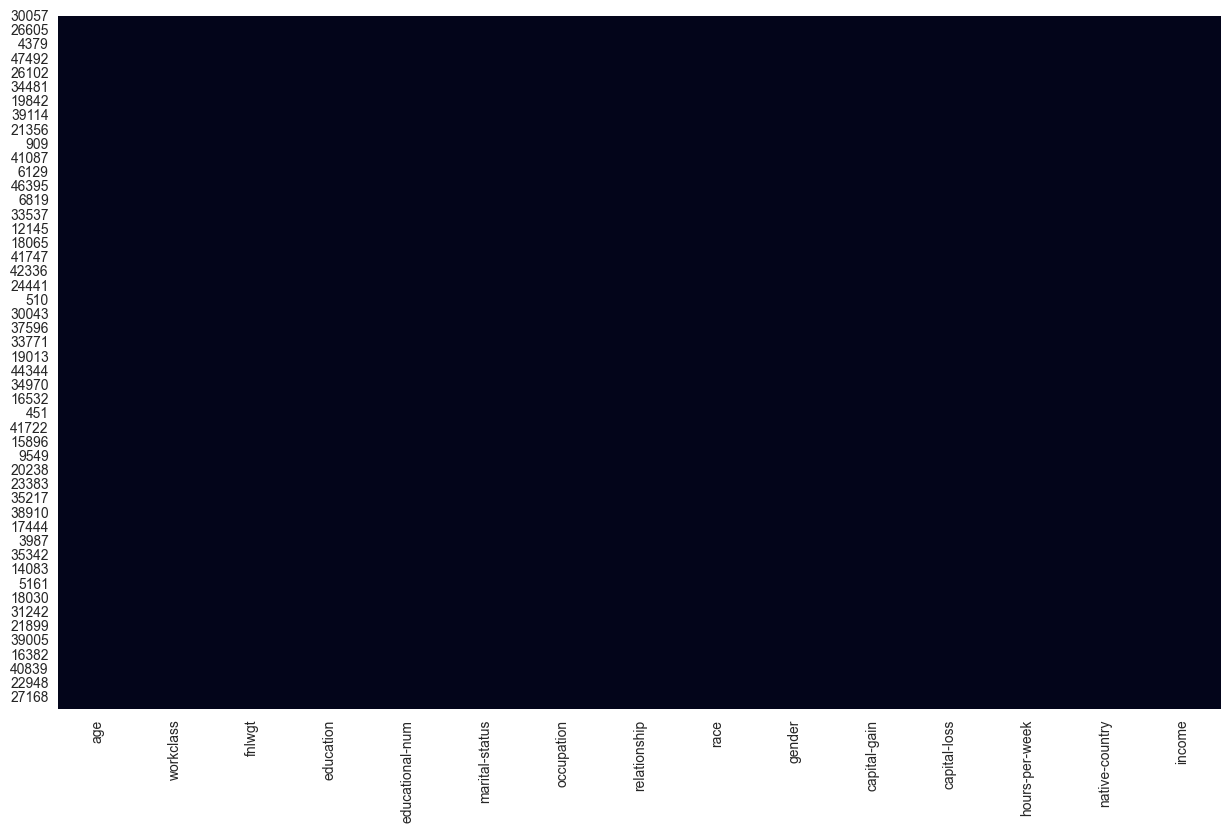

age                0.0
workclass          0.0
fnlwgt             0.0
education          0.0
educational-num    0.0
marital-status     0.0
occupation         0.0
relationship       0.0
race               0.0
gender             0.0
capital-gain       0.0
capital-loss       0.0
hours-per-week     0.0
native-country     0.0
income             0.0
dtype: float64


In [65]:
plt.figure(figsize=(15, 9))
sns.heatmap(df.isna(), cbar=False)
plt.show()

percentageOfNaNValues = (df.isna().sum() / df.shape[0]).sort_values(ascending=True)

print(percentageOfNaNValues) # Normalized values between O and 1

B) Analysis the dataset

In [66]:
columnNames = df.columns
datasetShape = df.shape
variablesTypes = df.dtypes
variablesTypesCount = df.dtypes.value_counts()

print('Column names :', columnNames, '\n')
print('Dataset Shape :', datasetShape, '\n')
print('Variables Types :', variablesTypes, '\n')
print('Variables Types Count :', variablesTypesCount)

Column names : Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object') 

Dataset Shape : (9767, 15) 

Variables Types : age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object 

Variables Types Count : object    9
int64     6
dtype: int64


Dropping the useless features.

In [67]:
df = df.drop(['age', 'educational-num', 'marital-status', 'hours-per-week', 'race', 'fnlwgt'], axis=1)
print(df)

          workclass     education        occupation    relationship  gender  \
30057     Local-gov       HS-grad     Other-service       Unmarried  Female   
45969  Self-emp-inc       HS-grad   Exec-managerial   Not-in-family    Male   
13556       Private       HS-grad  Transport-moving         Husband    Male   
21149       Private  Some-college             Sales  Other-relative    Male   
35406       Private  Some-college   Exec-managerial       Own-child    Male   
...             ...           ...               ...             ...     ...   
37940       Private     Assoc-voc      Craft-repair       Unmarried    Male   
22440       Private       HS-grad     Other-service   Not-in-family  Female   
20523       Private  Some-college      Craft-repair       Own-child    Male   
46878     Local-gov       Masters    Prof-specialty       Unmarried  Female   
14538       Private       HS-grad   Protective-serv   Not-in-family    Male   

       capital-gain  capital-loss native-country in

C) Analysis of the target variable

Repartition of the target :
 <=50K    7379
>50K     2388
Name: income, dtype: int64

Type of this variable: object


<Axes: ylabel='income'>

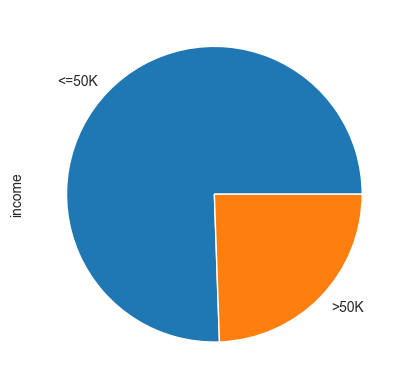

In [68]:
count_target = df['income'].value_counts()
target_type = df['income'].dtype

print('Repartition of the target :\n', count_target)
print('\nType of this variable:', target_type)
count_target.plot.pie()

## 2 - Pre-processing

In [69]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

Pre-processing of the variables

In [70]:
print(df.columns.tolist())
encoder = preprocessing.LabelEncoder()
features = ['workclass', 'education', 'occupation', 'relationship', 'gender', 'native-country', 'income']
df[features] = df[features].apply(encoder.fit_transform)
print(df)

['workclass', 'education', 'occupation', 'relationship', 'gender', 'capital-gain', 'capital-loss', 'native-country', 'income']
       workclass  education  occupation  relationship  gender  capital-gain  \
30057          2         11           8             4       0             0   
45969          5         11           4             1       1             0   
13556          4         11          14             0       1             0   
21149          4         15          12             2       1             0   
35406          4         15           4             3       1             0   
...          ...        ...         ...           ...     ...           ...   
37940          4          8           3             4       1             0   
22440          4         11           8             1       0             0   
20523          4         15           3             3       1             0   
46878          2         12          10             4       0             0   
1453

We can finally build the matrices X and y.

In [71]:
X = df.drop(['income'], axis=1)
y = df['income']

print(X)
print(y)

# Samples for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7)
print(X_train.shape)
print(X_test.shape)

       workclass  education  occupation  relationship  gender  capital-gain  \
30057          2         11           8             4       0             0   
45969          5         11           4             1       1             0   
13556          4         11          14             0       1             0   
21149          4         15          12             2       1             0   
35406          4         15           4             3       1             0   
...          ...        ...         ...           ...     ...           ...   
37940          4          8           3             4       1             0   
22440          4         11           8             1       0             0   
20523          4         15           3             3       1             0   
46878          2         12          10             4       0             0   
14538          4         11          11             1       1             0   

       capital-loss  native-country  
30057        

## 3 - Ensemble learning methods

#### A) Bagging method

We import the needed librairies for this section.

In [72]:
from collections import Counter
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

We can try several methods and compare their performances.


Bagging method from scratch.

In [73]:
def BaggingScratch(X_train, y_train, X_test, base_estimator, n_estimators=10):
    y_pred = np.zeros((X_test.shape[0], n_estimators))  # Initialization of the array which will store all the predictions for n estimators

    for i in range(n_estimators):
        num = np.random.choice(X_train.index.values, size=X_train.shape[0], replace=True)  # Resample with replacement
        X_bstr = X_train.loc[num]  # Access to the row which has index num
        y_bstr = y_train.loc[num]  # Access to the column which has index num
        base_estimator.fit(X_bstr, y_bstr)  # Fitting with a base_estimator
        y_pred[:, i] = base_estimator.predict(X_test)  # Writing the predictions results in y_pred array

    # Aggregate the predictions using majority voting
    y_pred_majority = np.zeros(X_test.shape[0])
    for i in range(X_test.shape[0]):
        y_pred_i = y_pred[i, :]
        c = Counter(y_pred_i)  # Read all the values in y_pred_i
        y_pred_majority[i] = c.most_common(1)[0][0]  # Getting the most common element and its count (passing 1 as argument and [0][0] to get the most common element)

    return y_pred_majority

knn = KNeighborsClassifier(n_neighbors=3)
lr = LogisticRegression()
y_pred_knn = BaggingScratch(X_train=X_train, y_train=y_train, X_test=X_test, base_estimator=knn)
y_pred_lr = BaggingScratch(X_train=X_train, y_train=y_train, X_test=X_test, base_estimator=lr)
# number of estimators is set to 100 by default

accuracyScratch_KNN = accuracy_score(y_test, y_pred_knn)
accuracyScratch_LR = accuracy_score(y_test, y_pred_lr)
print('Accuracy for Bagging from Scratch with KNN :', accuracyScratch_KNN)
print('Accuracy for Bagging from Scratch with LR :', accuracyScratch_LR)

Accuracy for Bagging from Scratch with KNN : 0.8437393381098601
Accuracy for Bagging from Scratch with LR : 0.8007505970658478


Bagging method using scikit-learn.

In [74]:
# Bagging KNN
# Defining different values of n_estimators to try
n_estimators = [10, 20, 50, 100, 200]

# Defining the parameter grid for the Bagging Classifier
param_grid = {'n_estimators': n_estimators, 'base_estimator': [KNeighborsClassifier()]}

# Performing Grid Search to find the best value of n_estimators for the bagging classifier
model1_KNN = GridSearchCV(BaggingClassifier(), param_grid=param_grid)
model1_KNN.fit(X_train, y_train)
model1_KNN.predict(X_test)
accuracy1 = model1_KNN.score(X_test, y_test)

print("Best value of n_estimators:", model1_KNN.best_params_['n_estimators'])
print("Accuracy for bagging with KNN:", accuracy1)

###

# Single KNN
# Defining different values of n_neighbors to try
n_neighbors = [i for i in range(1, 27, 2)]

# loop over different values of n_neighbors and evaluate the score to select the hyperparameters with high score
best_score = 0
best_k = 0
for k in n_neighbors:
    # For each value of n_neighbors, we execute a model prediction and look at its accuracy.
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    model.predict(X_test)
    score = model.score(X_test, y_test)
    if score > best_score:  # The parameters with the best accuracy are stored into variables
        best_score = score
        best_k = k

model2_KNN = KNeighborsClassifier(n_neighbors=best_k)
model2_KNN.fit(X_train, y_train)
model2_KNN.predict(X_test)
accuracy2 = model2_KNN.score(X_test, y_test)

print("Best value of k:", best_k)
print("Accuracy with single KNN:", accuracy2)


if (accuracy1 > accuracy2):
    print('The bagging method has a better accuracy than the single method.')
elif (accuracy1 < accuracy2):
    print('The single method has a better accuracy than the bagging method.')
elif (accuracy1 == accuracy2):
    print('The single method and the bagging method as same accuracies.')
print('The difference of accuracies between the single method and the bagging is :', abs(accuracy2 - accuracy1))

Best value of n_estimators: 20
Accuracy for bagging with KNN: 0.8512453087683385
Best value of k: 3
Accuracy with single KNN: 0.8512453087683385
The single method and the bagging method as same accuracies.
The difference of accuracies between the single method and the bagging is : 0.0


In [75]:
# Bagging Logistic Regression
# Defining different values of n_estimators to try
n_estimators = [10, 50, 100, 200]

# Defining the parameter grid for the Bagging Classifier
param_grid = {'n_estimators': n_estimators, 'base_estimator': [LogisticRegression()]}

model1_LR = GridSearchCV(BaggingClassifier(), param_grid=param_grid)  # Performing Grid Search to find the best parameters for the Bagging Classifier
model1_LR.fit(X_train, y_train)
model1_LR.predict(X_test)
accuracy1 = model1_LR.score(X_test, y_test)

print("Best value of n_estimators for Logistic Regression:", model1_LR.best_params_['n_estimators'])
print("Accuracy for bagging with Logistic Regression:", accuracy1)

###

# Single Logistic Regression
# Defining the parameter grid for logistic regression
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga']
}

model2_LR = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv=10)  # Performing Grid Search to find the best parameters for Logistic Regression
model2_LR.fit(X_train, y_train)
model2_LR.predict(X_test)
accuracy2 = model2_LR.score(X_test, y_test)

print("Best parameters:", model2_LR.best_params_)
print("Accuracy for Logistic Regression:", accuracy2)

###

if (accuracy1 > accuracy2):
    print('The bagging method has a better accuracy than the single method.')
elif (accuracy1 < accuracy2):
    print('The single method has a better accuracy than the bagging method.')
elif (accuracy1 == accuracy2):
    print('The single method and the bagging method as same accuracies.')
print('The difference of accuracies between the single method and the bagging is :', abs(accuracy2 - accuracy1))


KeyboardInterrupt



In [ ]:
# Prediction on a new observation
newPerson_df = pd.DataFrame(data=[['Local-gov', 'Some-college', 'Protective-serv', 'Husband', 'Male', 0, 0, 'United-States']], columns=features)
newPerson_df[features] = newPerson_df[features].apply(encoder.fit_transform)

pred_BaggingKNN = model2_KNN.predict(newPerson_df)
if pred_BaggingKNN == 0:
    pred_BaggingKNN = 'Earn less than $50K'
elif pred_BaggingKNN == 1:
    pred_BaggingKNN = 'Earn more than $50K'
print("Prediction Bagging KNN:", pred_BaggingKNN)

pred_BaggingLR = model2_LR.predict(newPerson_df)
if pred_BaggingLR == 0:
    pred_BaggingLR = 'Earn less than $50K'
elif pred_BaggingLR == 1:
    pred_BaggingLR = 'Earn more than $50K'
print("Prediction Bagging LR:", pred_BaggingLR)